<a href="https://colab.research.google.com/github/mahimscit/DO180-apps/blob/master/Analyzing_the_trends_of_COVID_19_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing the trends
of COVID-19 with Python

In [18]:
import pandas as pd
covid_df = pd.read_csv('covid_19_clean_complete.csv')
print(covid_df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [22]:
print(covid_df.shape)

(49068, 10)


In [23]:
covid_df = pd.read_csv('covid_19_clean_complete.csv')
covid_df['Date'] = pd.to_datetime(covid_df['Date'], errors='coerce', format='%Y-%m-%d')

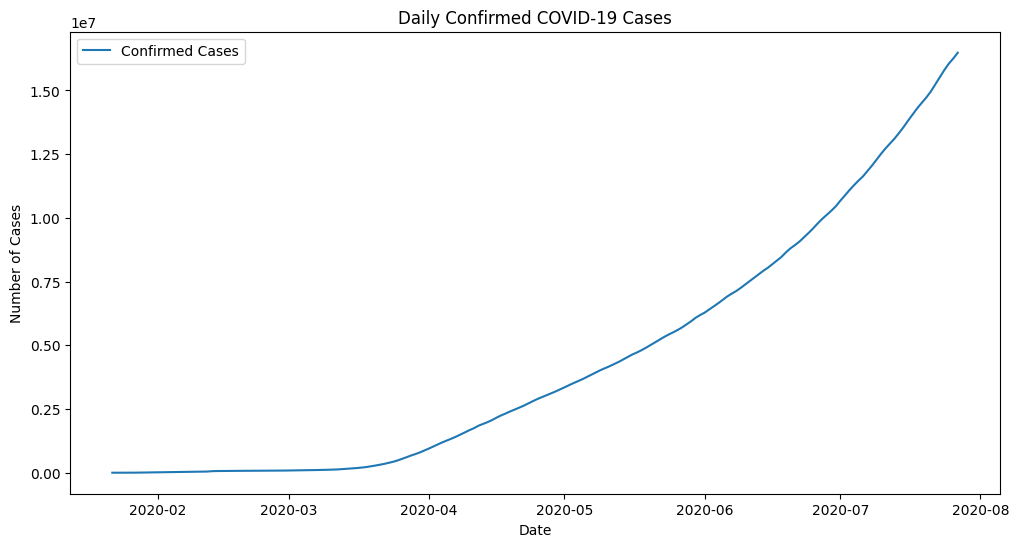

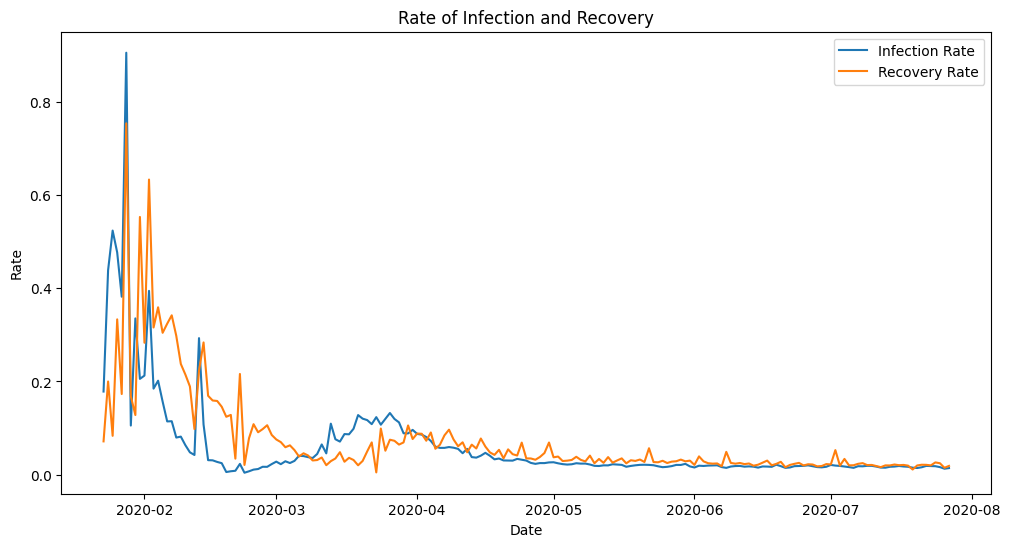

In [36]:
import matplotlib.pyplot as plt

daily_data = covid_df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()
daily_data['Confirmed'] = pd.to_numeric(daily_data['Confirmed'], errors='coerce')
daily_data['Recovered'] = pd.to_numeric(daily_data['Recovered'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Confirmed'], label='Confirmed Cases')
plt.title('Daily Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

daily_data['Infection Rate'] = daily_data['Confirmed'].diff() / daily_data['Confirmed'].shift(1)
daily_data['Recovery Rate'] = daily_data['Recovered'].diff() / daily_data['Recovered'].shift(1)
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Infection Rate'], label='Infection Rate')
plt.plot(daily_data['Date'], daily_data['Recovery Rate'], label='Recovery Rate')
plt.title('Rate of Infection and Recovery')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

● Use pandas to accumulate data from multiple data files.

In [26]:
import pandas as pd

file_path1 = 'covid_19_clean_complete1.csv'
file_path2 = 'covid_19_clean_complete2.csv'

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

combined_df = pd.concat([df1, df2], ignore_index=True)

print(combined_df.head())
print("Shape of combined DataFrame:", combined_df.shape)
combined_df

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0     0.0  Eastern Mediterranean  
1       0          0     0.0                 Europe  
2       0          0     0.0                 Africa  
3       0          0     0.0                 Europe  
4       0          0     0.0                 Africa  
Shape of combined DataFrame: (80959, 10)


Province/State            Country/Region       Lat        Long  \
0                NaN               Afghanistan  33.93911   67.709953   
1                NaN                   Albania  41.15330   20.168300   
2                NaN                   Algeria  28.03390    1.659600   
3                NaN                   Andorra  42.50630    1.521800   
4                NaN                    Angola -11.20270   17.873900   
...              ...                       ...       ...         ...   
80954   Saskatchewan                    Canada  52.93990 -106.450900   
80955            NaN  Central African Republic   6.61110   20.939400   
80956            NaN                      Chad  15.45420   18.732200   
80957            NaN                     Chile -35.67510  -71.543000   
80958          Anhui                     China  31.82570  117.226400   

             Date  Confirmed  Deaths  Recovered   Active  \
0      2020-01-22          0       0          0      0.0   
1      2020-01-22          0       0          0      0.0   
2      2020-01-22          0       0          0      0.0   
3      2020-01-22          0       0          0      0.0   
4      2020-01-22          0       0          0      0.0   
...           ...        ...     ...        ...      ...   
80954  2020-05-23        630       7          0    623.0   
80955  2020-05-23        552       1         18    533.0   
80956  2020-05-23        648      60        204    384.0   
80957  2020-05-23      80287     673      26546  53068.0   
80958  2020-05-23        991       6        985      NaN   

                  WHO Region  
0      Eastern Mediterranean  
1                     Europe  
2                     Africa  
3                     Europe  
4                     Africa  
...                      ...  
80954               Americas  
80955                 Africa  
80956                 Africa  
80957               Americas  
80958                    NaN  

[80959 rows x 10 columns]

Use plotly (visualization library) to create interactive visualizations.

In [28]:
import plotly.express as px

fig = px.line(covid_df, x='Date', y='Confirmed', color='Country/Region',
              title='Confirmed COVID-19 Cases Over Time')
fig.show()

In [29]:
fig = px.choropleth(covid_df, locations='Country/Region', locationmode='country names',
                    color='Confirmed', hover_name='Country/Region',
                    animation_frame='Date',
                    title='Global Spread of COVID-19 (Confirmed Cases)')
fig.show()

In [30]:
fig = px.scatter(covid_df, x='Confirmed', y='Recovered', color='Country/Region',
                 hover_name='Country/Region', size='Deaths',
                 title='Confirmed vs. Recovered COVID-19 Cases')
fig.show()

Use Facebook prophet library to make time series models.

In [31]:
from prophet import Prophet
daily_data = covid_df.groupby('Date')['Confirmed'].sum().reset_index()

daily_data = daily_data.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

In [32]:
model = Prophet()

model.fit(daily_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpujfz2_c_/2bdgbme2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpujfz2_c_/mit3ud5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80988', 'data', 'file=/tmp/tmpujfz2_c_/2bdgbme2.json', 'init=/tmp/tmpujfz2_c_/mit3ud5r.json', 'output', 'file=/tmp/tmpujfz2_c_/prophet_model8wjfx8r7/prophet_model-20241226073144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
future = model.make_future_dataframe(periods=7)

forecast = model.predict(future)

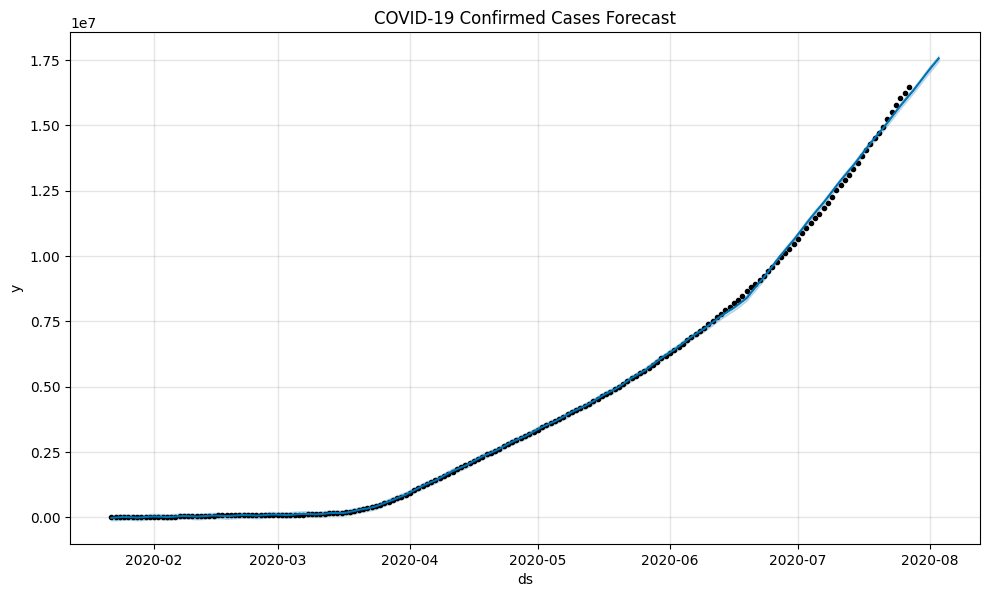

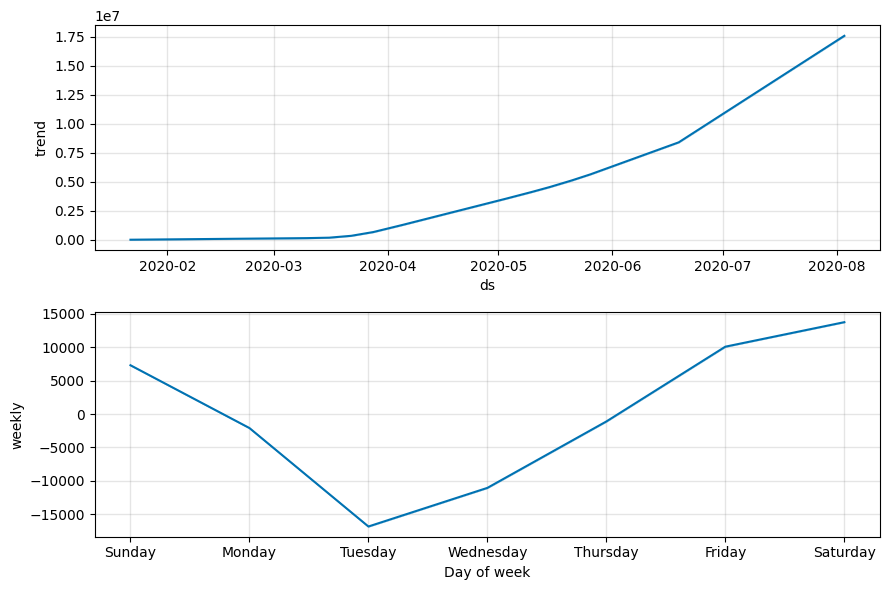

In [34]:
fig1 = model.plot(forecast)
plt.title('COVID-19 Confirmed Cases Forecast')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

Visualize the prediction by combining these technologies.

In [35]:
fig = px.line(forecast, x='ds', y='yhat', title='COVID-19 Confirmed Cases Forecast')
fig.add_scatter(x=daily_data['ds'], y=daily_data['y'], mode='lines', name='Actual')
fig.show()